### 수정할 값

In [1]:
# 원하는 데이터 path 설정 
path = "/SHK/test2.csv"
save_dir = "/SHK/AAV5 con eq6 cv 3 av 0.00001.csv"
save_plot = "/SHK/heatmap.png"

# 원하는 값 지정 

CV_limit = 3
mean_limit = 0.00001

### 아래는 자동화

In [2]:

import numpy as np
import pandas as pd

df = pd.read_csv(path)
df.columns

Index(['id', 'region', 'csv_file_num', 'M1-1', 'M1-3', 'M1-4', 'M1-5', 'M1-6',
       'HP_2', 'HP_4', 'HP_5', 'HP_6', 'HP_7', 'BF1', 'BF2', 'BF3', 'BF4',
       'BF5', 'BF6', 'PFC1', 'PFC3', 'PFC4', 'PFC5', 'PFC7'],
      dtype='object')

In [3]:
df_select = df[df["id"] <= 1103]
df_gray = df_select.copy()
print(len(df_gray))

cv_m1 = df_gray[['M1-1', 'M1-3', 'M1-4', 'M1-5', 'M1-6']].std(axis=1) / df_gray[['M1-1', 'M1-3', 'M1-4', 'M1-5', 'M1-6']].mean(axis=1)
cv_hp = df_gray[['HP_2','HP_4', 'HP_5', 'HP_6', 'HP_7']].std(axis=1) / df_gray[['HP_2','HP_4', 'HP_5', 'HP_6', 'HP_7']].mean(axis=1)
cv_bf = df_gray[['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6']].std(axis=1) / df_gray[['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6']].mean(axis=1)
cv_pfc = df_gray[['PFC1', 'PFC3', 'PFC4', 'PFC5', 'PFC7']].std(axis=1) / df_gray[['PFC1', 'PFC3', 'PFC4', 'PFC5', 'PFC7']].mean(axis=1)

cv_m1[np.isnan(cv_m1)] = 0
cv_hp[np.isnan(cv_hp)] = 0
cv_bf[np.isnan(cv_bf)] = 0
cv_pfc[np.isnan(cv_pfc)] = 0

df_gray['CV_M1'] = cv_m1
df_gray['CV_HP'] = cv_hp
df_gray['CV_BF'] = cv_bf
df_gray['CV_PFC'] = cv_pfc


df_gray['mean_M1'] = df_gray[['M1-1', 'M1-3', 'M1-4', 'M1-5', 'M1-6']].mean(axis=1)
df_gray['mean_HP'] = df_gray[['HP_2','HP_4', 'HP_5', 'HP_6', 'HP_7']].mean(axis=1)
df_gray['mean_BF'] = df_gray[['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6']].mean(axis=1)
df_gray['mean_PFC'] = df_gray[['PFC1', 'PFC3','PFC4', 'PFC5', 'PFC7']].mean(axis=1)


M1_selected = df_gray[(df_gray['CV_M1'] <= CV_limit) & (df_gray["mean_M1"] >= mean_limit) & (df_gray["mean_M1"] > df_gray["mean_HP"]) & 
                      (df_gray["mean_M1"] > df_gray["mean_BF"]) & 
                       (df_gray["mean_M1"] > df_gray["mean_PFC"])].sort_values(by=['mean_M1'], ascending=False)

HP_selected = df_gray[(df_gray['CV_HP'] <= CV_limit) & (df_gray["mean_HP"] >= mean_limit) & (df_gray["mean_HP"] > df_gray["mean_M1"]) & 
                      (df_gray["mean_HP"] > df_gray["mean_BF"]) & 
                       (df_gray["mean_HP"] > df_gray["mean_PFC"])].sort_values(by=['mean_HP'], ascending=False)

BF_selected = df_gray[(df_gray['CV_BF'] <= CV_limit) & (df_gray["mean_BF"] >= mean_limit) & (df_gray["mean_BF"] > df_gray["mean_M1"]) & 
                      (df_gray["mean_BF"] > df_gray["mean_HP"]) & 
                       (df_gray["mean_BF"] > df_gray["mean_PFC"])].sort_values(by=['mean_BF'], ascending=False)

PFC_selected = df_gray[(df_gray['CV_PFC'] <= CV_limit) & (df_gray["mean_PFC"] >= mean_limit) & (df_gray["mean_PFC"] > df_gray["mean_M1"]) & 
                      (df_gray["mean_PFC"] > df_gray["mean_BF"]) & 
                      (df_gray["mean_PFC"] > df_gray["mean_HP"])].sort_values(by=['mean_PFC'], ascending=False)


selected_rows = pd.concat([M1_selected, HP_selected, BF_selected, PFC_selected]).drop_duplicates()

# 그룹 정보 추가
selected_rows['Group'] = np.nan
selected_rows.loc[selected_rows.index.isin(M1_selected.index), 'Group'] = 'M1'
selected_rows.loc[selected_rows.index.isin(HP_selected.index), 'Group'] = 'HP'
selected_rows.loc[selected_rows.index.isin(BF_selected.index), 'Group'] = 'BF'
selected_rows.loc[selected_rows.index.isin(PFC_selected.index), 'Group'] = 'PFC'

selected_rows

411


,id,region,csv_file_num,M1-1,M1-3,M1-4,M1-5,M1-6,HP_2,HP_4,...,PFC7,CV_M1,CV_HP,CV_BF,CV_PFC,mean_M1,mean_HP,mean_BF,mean_PFC,Group
87,531.0,Presubiculum,6.0,0.0000,2.2551,0.0000,0.0000,0.0,0.0,0.0,...,0.0,2.236068,0.0,0.0,0.000000,0.45102,0.0,0.0,0.00000,M1
177,699.0,Paracentral nucleus,6.0,0.0000,0.0000,2.1037,0.0000,0.0,0.0,0.0,...,0.0,2.236068,0.0,0.0,0.000000,0.42074,0.0,0.0,0.00000,M1
176,698.0,Central medial nucleus of the thalamus,6.0,0.0000,0.0000,2.0436,0.0000,0.0,0.0,0.0,...,0.0,2.236068,0.0,0.0,2.236068,0.40872,0.0,0.0,0.09580,M1
3,24.0,Secondary motor area,6.0,0.6144,0.0000,0.9169,0.0502,0.0,0.0,0.0,...,0.0,1.341786,0.0,0.0,1.489754,0.31630,0.0,0.0,0.13592,M1
0,6.0,"Frontal pole, cerebral cortex",5.0,0.0000,0.0000,1.5451,0.0000,0.0,0.0,0.0,...,0.0,2.236068,0.0,0.0,0.000000,0.30902,0.0,0.0,0.00000,M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1033.0,Culmen,4.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.236068,0.00000,0.0,0.0,0.00794,PFC
392,1042.0,Lobules IV-V,5.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.236068,0.00000,0.0,0.0,0.00794,PFC
41,279.0,"Agranular insular area, dorsal part",6.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.236068,0.00000,0.0,0.0,0.00718,PFC
81,493.0,Entorhinal area,6.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.236068,0.00000,0.0,0.0,0.00704,PFC


In [4]:

selected_rows.columns

Index(['id', 'region', 'csv_file_num', 'M1-1', 'M1-3', 'M1-4', 'M1-5', 'M1-6',
       'HP_2', 'HP_4', 'HP_5', 'HP_6', 'HP_7', 'BF1', 'BF2', 'BF3', 'BF4',
       'BF5', 'BF6', 'PFC1', 'PFC3', 'PFC4', 'PFC5', 'PFC7', 'CV_M1', 'CV_HP',
       'CV_BF', 'CV_PFC', 'mean_M1', 'mean_HP', 'mean_BF', 'mean_PFC',
       'Group'],
      dtype='object')

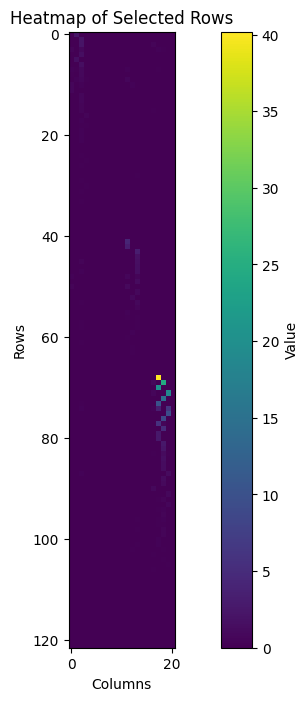

In [5]:
import matplotlib.pyplot as plt

selected_rows_without_group = selected_rows.drop(columns=['id', 'region', 'csv_file_num', 'CV_M1', 'CV_HP', 'CV_BF', 'CV_PFC', 'mean_M1',
       'mean_HP', 'mean_BF', 'mean_PFC', 'Group'])


# 데이터프레임의 값을 숫자(float)로 변환
selected_rows_numeric = selected_rows_without_group.astype(float)

# 값이 50을 초과하는 경우 50으로 맞춤
selected_rows_numeric[selected_rows_numeric > 50] = 50

# 히트맵 그리기
plt.figure(figsize=(12, 8))
plt.imshow(selected_rows_numeric, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Selected Rows')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.savefig(save_plot, dpi=500)
plt.show()




In [6]:
selected_rows.to_csv(save_dir)